In [1]:
library(ggplot2)
library(naturalsort)
library(stringr)
library(vcfR)
library(data.table)
library(dplyr)


   *****       ***   vcfR   ***       *****
   This is vcfR 1.12.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****



Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
alleles_overall=fread("./alleles.tsv.gz", data.table=FALSE, sep="\t")
head(alleles_overall)

homozygous_gt=fread("./homozygous_gt.csv.gz", data.table=FALSE)
gt=fread("./gt.csv.gz", data.table=FALSE)

,POS,CHROM,alleles
,<int>,<chr>,<chr>
1,33,chromosome1,"CA,C"
2,56,chromosome1,"A,AC"
3,63,chromosome1,"T,C"
4,65,chromosome1,"CTA,C"
5,71,chromosome1,"CTACCCTAA,C"
6,83,chromosome1,"AG,A"


In [3]:
files=dir(path = "figures", pattern="-OppositeHomo.csv$", full.names = TRUE)
files

[1] "figures/ACKxACV-data-MQ60-cov50_76-DP50-OppositeHomo.csv"    
[2] "figures/ACPxBFP-data-MQ60-cov39_92-DP39-OppositeHomo.csv"    
[3] "figures/AKExBAH-data-MQ60-cov69_111.7-DP69-OppositeHomo.csv" 
[4] "figures/ANGxCEI-data-MQ60-cov64_87-DP64-OppositeHomo.csv"    
[5] "figures/ATExYCR-data-MQ60-cov44_95-DP44-OppositeHomo.csv"    
[6] "figures/BAHxCGD-data-MQ60-cov54_79-DP54-OppositeHomo.csv"    
[7] "figures/BAPxCMP-data-MQ60-cov71_111-DP71-OppositeHomo.csv"   
[8] "figures/CCDxCPG-data-MQ60-cov63.3_98-DP63.3-OppositeHomo.csv"

In [4]:
vcfs=dir(path = "ceberlein_data", pattern="vcf.m2M3-snps.vcf.gz$", full.names = TRUE)
vcfs

[1] "ceberlein_data/1_ACPxBFP.vcf.m2M3-snps.vcf.gz"
[2] "ceberlein_data/2_BAPxCMP.vcf.m2M3-snps.vcf.gz"
[3] "ceberlein_data/3_CCDxCPG.vcf.m2M3-snps.vcf.gz"
[4] "ceberlein_data/4_ATExYCR.vcf.m2M3-snps.vcf.gz"
[5] "ceberlein_data/5_ACKxACV.vcf.m2M3-snps.vcf.gz"
[6] "ceberlein_data/6_AKExBAH.vcf.m2M3-snps.vcf.gz"
[7] "ceberlein_data/7_BAHxCGD.vcf.m2M3-snps.vcf.gz"
[8] "ceberlein_data/8_ANGxCEI.vcf.m2M3-snps.vcf.gz"

Joining, by = c("POS", "CHROM")

Joining, by = c("POS", "CHROM")

Joining, by = c("POS", "CHROM")

Warning message:
"Removed 7395 rows containing missing values (geom_point)."
Warning message:
"Removed 7395 rows containing missing values (geom_point)."
Joining, by = c("POS", "CHROM")

Joining, by = c("POS", "CHROM")

Joining, by = c("POS", "CHROM")

Warning message:
"Removed 19553 rows containing missing values (geom_point)."
Warning message:
"Removed 19553 rows containing missing values (geom_point)."
Joining, by = c("POS", "CHROM")

Joining, by = c("POS", "CHROM")

Joining, by = c("POS", "CHROM")



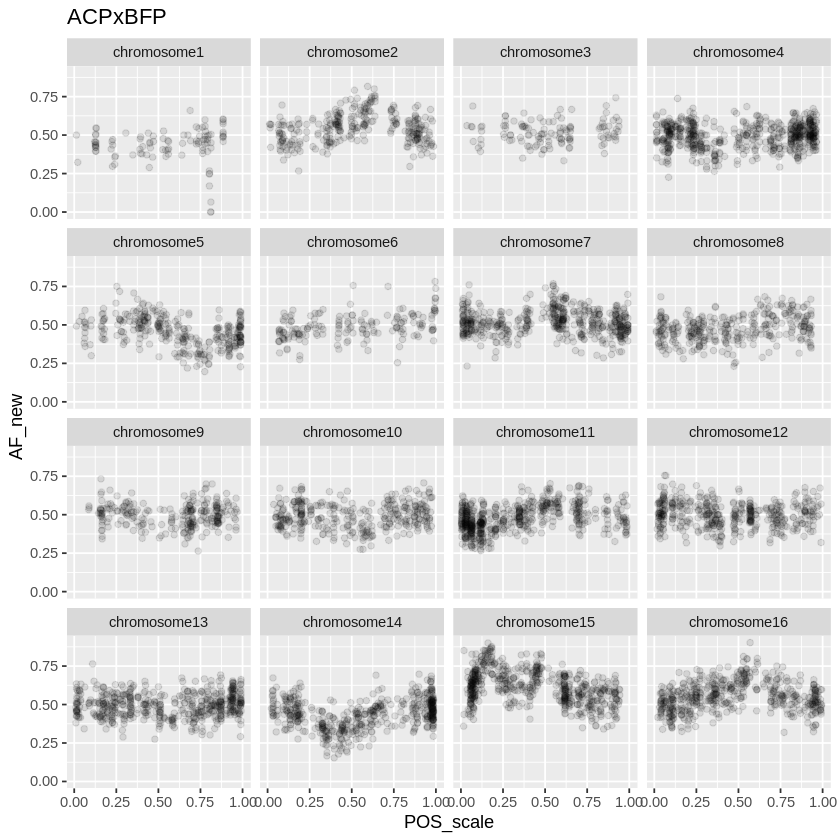

Warning message:
"Removed 20715 rows containing missing values (geom_point)."
Warning message:
"Removed 20715 rows containing missing values (geom_point)."
Joining, by = c("POS", "CHROM")

Joining, by = c("POS", "CHROM")

Joining, by = c("POS", "CHROM")



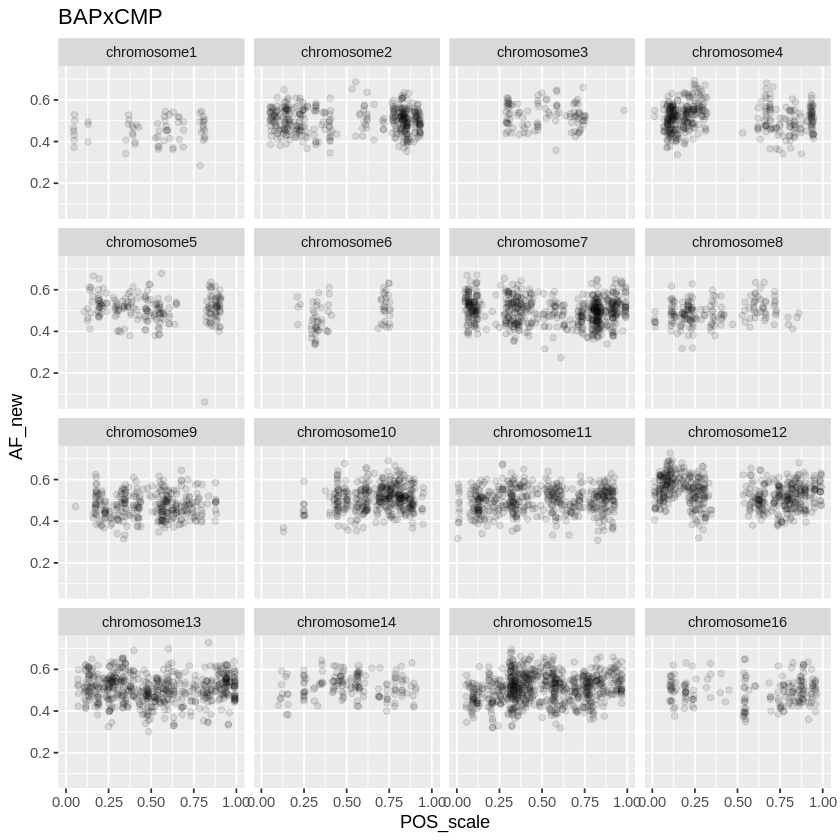

Warning message:
"Removed 32977 rows containing missing values (geom_point)."
Warning message:
"Removed 32977 rows containing missing values (geom_point)."
Joining, by = c("POS", "CHROM")

Joining, by = c("POS", "CHROM")

Joining, by = c("POS", "CHROM")



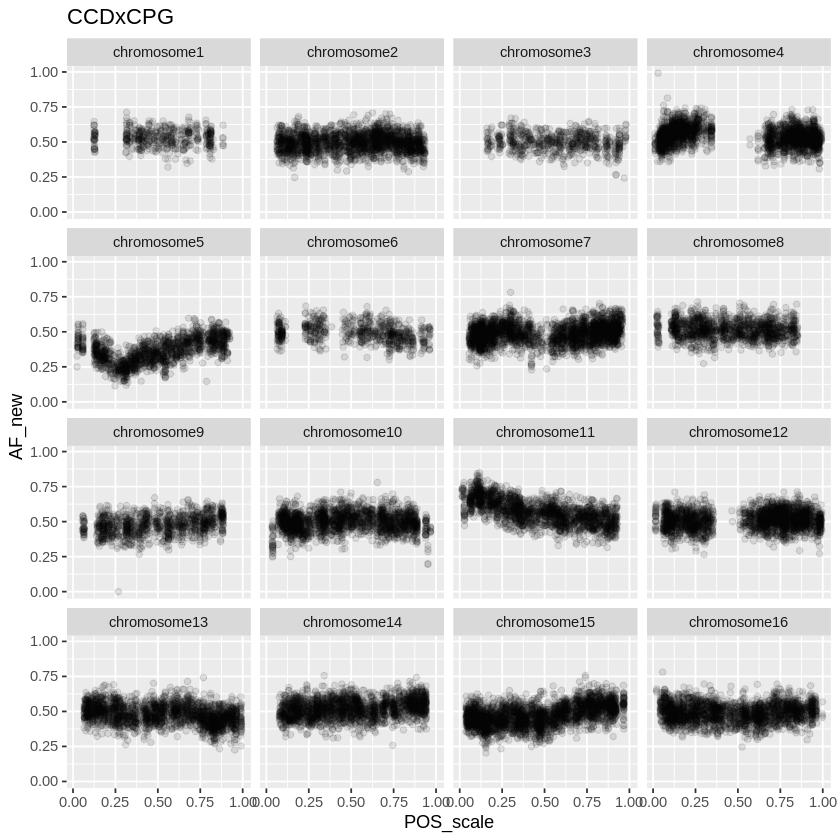

Warning message:
"Removed 3853 rows containing missing values (geom_point)."
Warning message:
"Removed 3853 rows containing missing values (geom_point)."
Joining, by = c("POS", "CHROM")

Joining, by = c("POS", "CHROM")

Joining, by = c("POS", "CHROM")



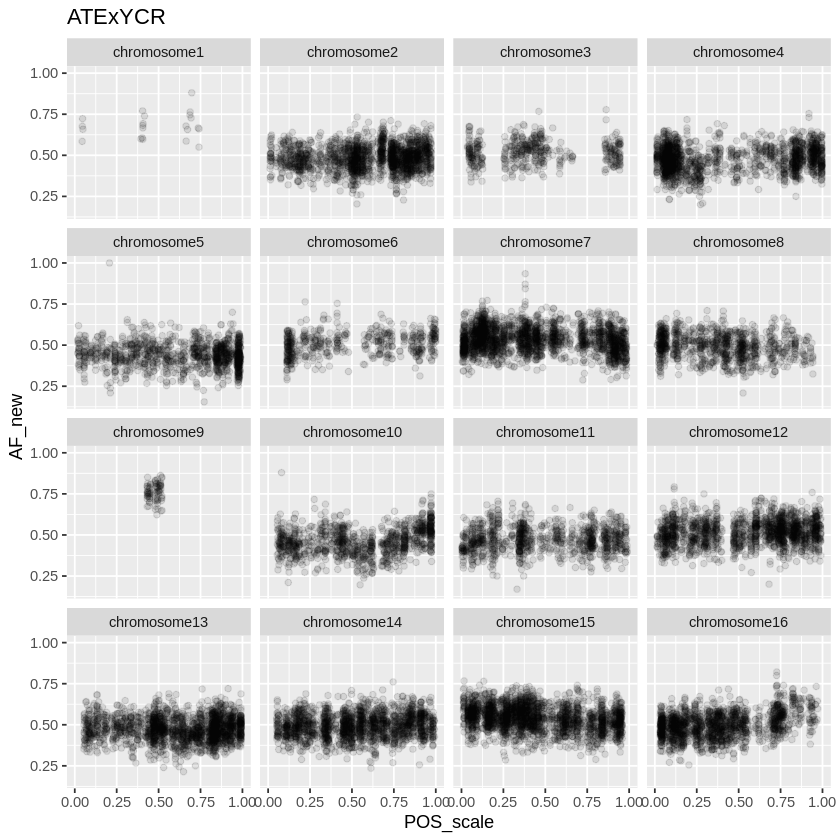

Warning message:
"Removed 23922 rows containing missing values (geom_point)."
Warning message:
"Removed 23922 rows containing missing values (geom_point)."
Joining, by = c("POS", "CHROM")

Joining, by = c("POS", "CHROM")

Joining, by = c("POS", "CHROM")



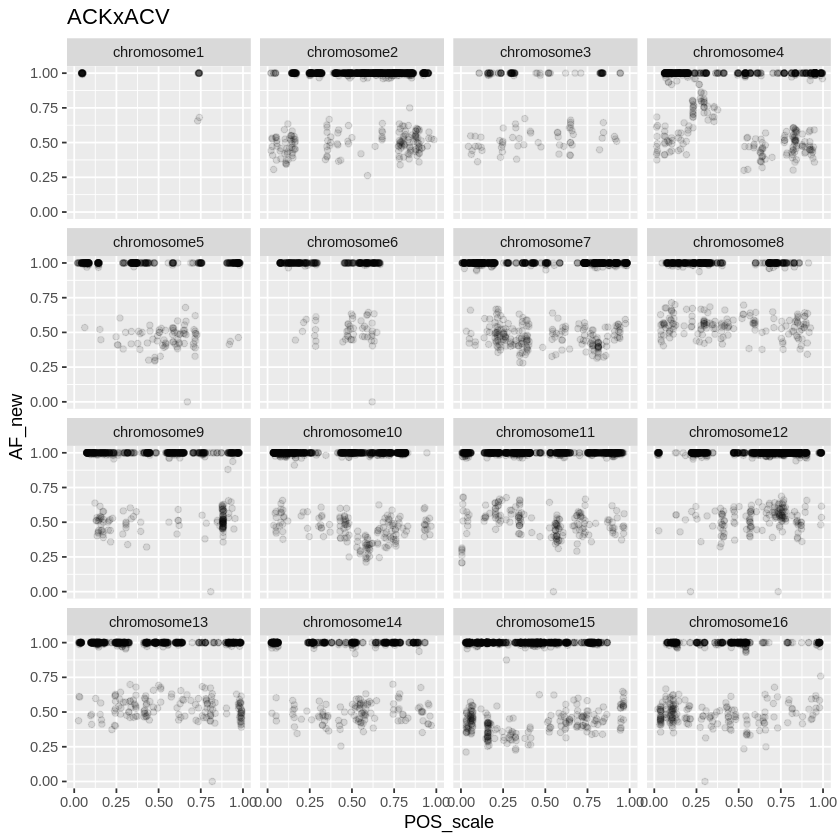

Warning message:
"Removed 518 rows containing missing values (geom_point)."
Warning message:
"Removed 518 rows containing missing values (geom_point)."
Joining, by = c("POS", "CHROM")

Joining, by = c("POS", "CHROM")

Joining, by = c("POS", "CHROM")



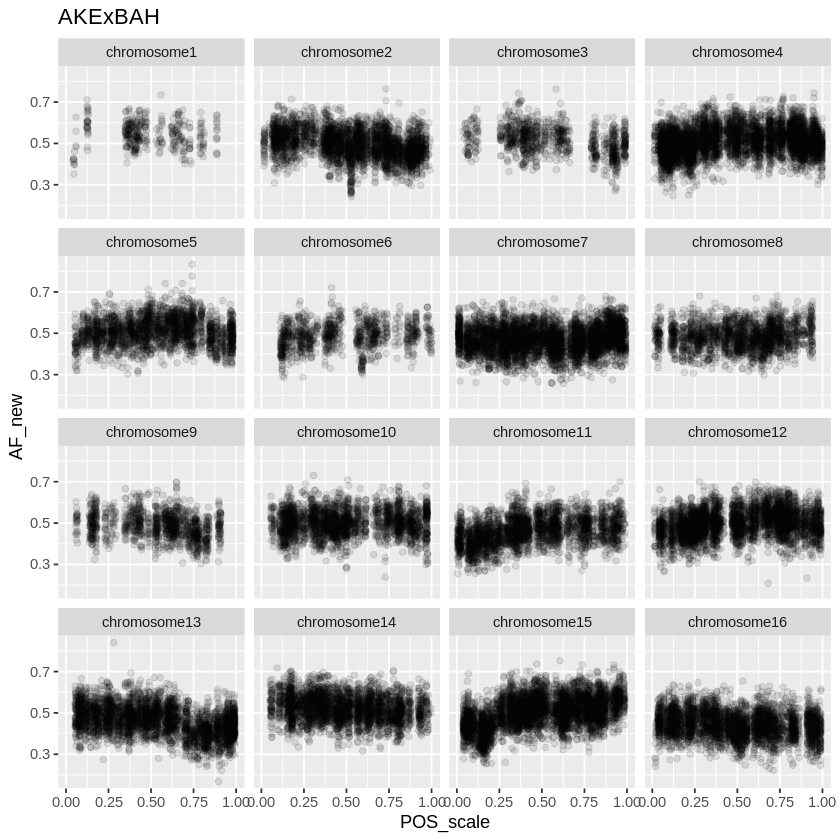

Warning message:
"Removed 73558 rows containing missing values (geom_point)."
Warning message:
"Removed 73558 rows containing missing values (geom_point)."


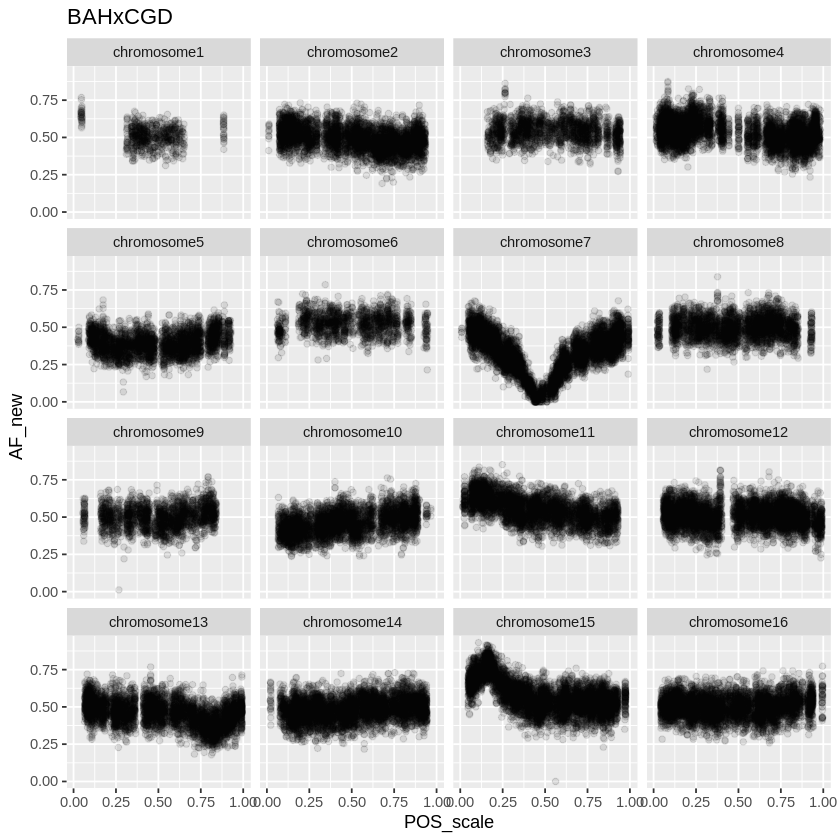

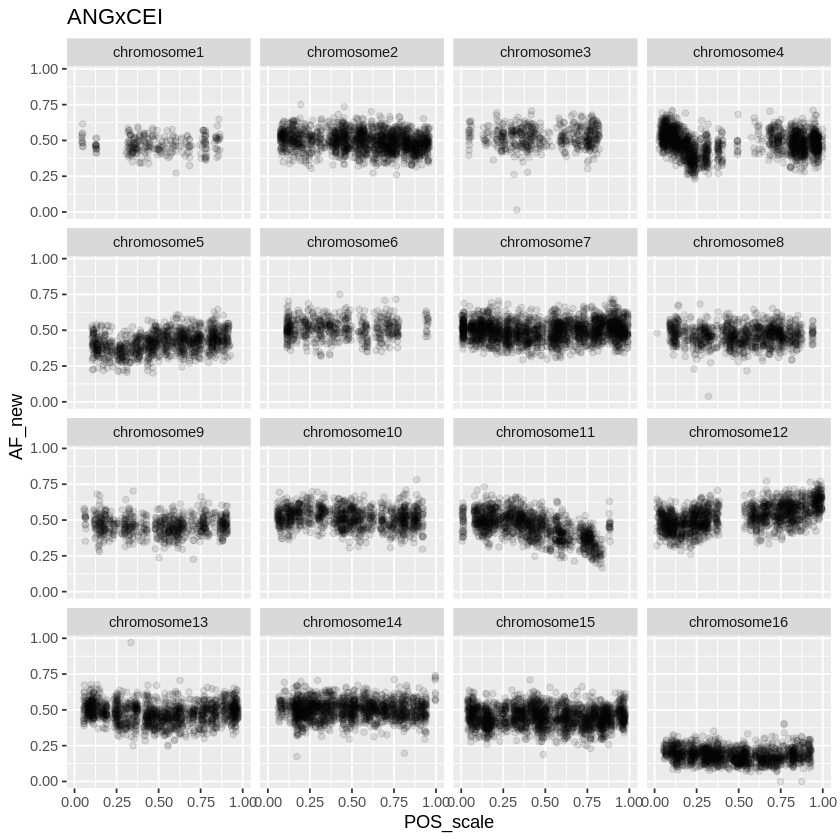

In [50]:
for(i in 1:length(vcfs)){
    vcf <- read.vcfR(vcfs[7], verbose = FALSE )

    REF=vcfR::getREF(vcf)
    ALTS=vcfR::getALT(vcf)

    alleles=data.frame(POS=vcfR::getPOS(vcf), CHROM=vcfR::getCHROM(vcf),GT=vcfR::extract.gt(vcf)[,1],alleles_of_cross=paste(REF,ALTS,sep=","), stringsAsFactors = FALSE)

    head(alleles)

    cross=strsplit(strsplit(basename(vcfs[i]),".vcf")[[1]][1],"_")[[1]][2]

    getColsInGTfile=function(x){
        return(colnames(homozygous_gt)[grepl(x,colnames(homozygous_gt))])
    }

    colsGT=unlist(lapply(strsplit(cross,"x")[[1]], getColsInGTfile))

        if(length(colsGT)>2){
            stop()
        }

    homozygous_gt_cross=homozygous_gt[,c("POS","CHROM",colsGT)]
    gt_cross=gt[,c("POS","CHROM",colsGT)]

    file=files[which(grepl(cross,files,fixed=TRUE))]
    if(length(file)==0){
        break
    }

    gt_cross=left_join(gt_cross,alleles_overall)
    head(gt_cross)

    df=fread(file, data.table = FALSE)

    df=left_join(df, gt_cross)
    head(df)

    df=left_join(df, alleles)
    head(df)

    head(df)

    df$OriginAlleleLeft=NA
    df$OriginAlleleRight=NA

    getAlleleNumeric=function(x, which){
        return(as.numeric(strsplit(x,"/",fixed = TRUE)[[1]][which]))
    }
    getAlleleCharacter1=function(x){
        which=df$Numeric1[x]
        return(strsplit(df$alleles_of_cross[x],",",fixed = TRUE)[[1]][which+1])
        }
    getAlleleCharacter2=function(x){
        which=df$Numeric2[x]
        return(strsplit(df$alleles_of_cross[x],",",fixed = TRUE)[[1]][which+1])
        }



    getAlleleNumericIn1k=function(x){
        which=df$Char1[x]
        if(which %in% strsplit(df$alleles[x],",",fixed = TRUE)[[1]])
            {
            return(which(strsplit(df$alleles[x],",",fixed = TRUE)[[1]] == which)-1)
        }

        return(NA)
    }
    getAlleleNumericIn1k2=function(x){
        which=df$Char2[x]
        if(which %in% strsplit(df$alleles[x],",",fixed = TRUE)[[1]])
            {
            return(which(strsplit(df$alleles[x],",",fixed = TRUE)[[1]] == which)-1)
        }

        return(NA)
    }
    getWhichOriginPopulation=function(x){
        which=df$Num1k1[x]
        if(is.na(which)){
            return(NA)
        }
        #print(substr(df[x,10],1,1))
        if(substr(df[x,10],1,1)==which){
            return(0)
        }
        if(substr(df[x,11],1,1)==which){
            return(1)
        }
        return(NA)
    }
    getWhichOriginPopulation2=function(x){
        which=df$Num1k2[x]
        if(is.na(which)){
            return(NA)
        }
        #print(substr(df[x,10],1,1))
        if(substr(df[x,10],3,3)==which){
            return(0)
        }
        if(substr(df[x,11],3,3)==which){
            return(1)
        }
        return(NA)
    }

    df$Numeric1=0
    df$Numeric2=1



    df$Char1=unlist(lapply(1:nrow(df), getAlleleCharacter1))
    df$Char2=unlist(lapply(1:nrow(df), getAlleleCharacter2))

    df$Num1k1=unlist(lapply(1:nrow(df), getAlleleNumericIn1k))
    df$Num1k2=unlist(lapply(1:nrow(df), getAlleleNumericIn1k2))

    df$OriginAlleleLeft=unlist(lapply(1:nrow(df), getWhichOriginPopulation))
    df$OriginAlleleRight=unlist(lapply(1:nrow(df), getWhichOriginPopulation2))

    head(df[,1:16])

    df$AF_new=df$AF
    df$AF_new[df$OriginAlleleRight==0 & !is.na(df$OriginAlleleRight)]=1-df$AF[df$OriginAlleleRight==0 & !is.na(df$OriginAlleleRight)]
    df$AF_new[is.na(df$OriginAlleleRight)]=NA

    library(naturalsort)

    df$CHROM=factor(as.character(df$CHROM), levels=naturalsort(unique(df$CHROM)))
    summary(df$CHROM)

    print(p<-ggplot(df, aes(POS_scale,AF_new))+
    geom_point(alpha=0.1)+
        facet_wrap(~CHROM)+
    ggtitle(cross))

        ggsave(p, filename = paste("figures/",cross,"-01reset.png",sep=""), width = 10, height= 10)

}